<a href="https://colab.research.google.com/github/VinodKumar9576/test/blob/master/Boston House price prediction/Implementation using DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Boston Houses price prediction using Decision Tree**

**<h1>Contents**

* Reading the data set
* Distribution of data (Distributions within variables itself)
* Data Exploration
  * Implementation : Calculate Statistics
  * plotting of features vs output variable
* Developing a Model
  * Implementation: 
    * Define a Performance Metric
    * Shuffle an Split Data
* Analyzing Model Performance
  * Learning Curves
  * Complexity Curves
* Evaluating Model Performance
* Implementation : Fitting a Model
* Making predictions

**<h1>Reading the data**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"vinodkumar9576","key":"af074010bd4c7bb75f9d1fe71f31452d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d schirmerchad/bostonhoustingmlnd

from zipfile import ZipFile
import pandas as pd

with ZipFile('/content/bostonhoustingmlnd.zip','r') as z:
  hs_data = pd.read_csv(z.open('housing.csv'))

  0% 0.00/4.35k [00:00<?, ?B/s]
100% 4.35k/4.35k [00:00<00:00, 6.92MB/s]


In [0]:
hs_data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [0]:
hs_data.shape

(489, 4)

**<h1>Splitting the data**

In [0]:
prices = hs_data['MEDV']
features = hs_data.drop(labels=['MEDV'], axis = 1)

print('Boston housing dataset has {} data points with {} variables each'.format(*hs_data.shape))

Boston housing dataset has 489 data points with 4 variables each


In [0]:
features

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [0]:
prices

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

**<h1> Distribution of data**

In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [0]:
figp = make_subplots(rows=1,cols=3, subplot_titles=['Average number of rooms distribution','Homeowners distribution with low class','Students to Teachers ratio distribution'])

figp.add_trace(go.Histogram(x=hs_data['RM'], nbinsy=15, name='RM'), row=1,col=1)
figp.add_trace(go.Histogram(x=hs_data['LSTAT'], nbinsy=15, name='LSTAT'), row=1,col=2)
figp.add_trace(go.Histogram(x=hs_data['PTRATIO'], nbinsy=15, name='PTRATIO'), row=1,col=3)

#making xaxes label
figp.update_xaxes(title_text='RM', row=1, col=1)
figp.update_xaxes(title_text='LSTAT', row=1, col=2)
figp.update_xaxes(title_text='PTRATIO', row=1, col=3)

#making Yaxes label
figp.update_yaxes(title_text='frequency', row=1, col=1)
figp.update_yaxes(title_text='frequency', row=1, col=2)
figp.update_yaxes(title_text='frequency', row=1, col=3)

figp.update_layout(
    title = 'Distribution of features',
    title_x=0.5
)

figp.show()

**<h1> Data Exploration**

**<h2>Implementation: Calculate Statistics**

* Now, we are going to calculate the statistics like **min**, **max**, **mean**, **median**, **standard deviation** of output variable i.e. 'MEDV'.

In [0]:
min_price=np.min(prices)

max_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

#printing
print(f'Minimum price : ${min_price}')
print(f'Maximum price : ${max_price}')
print(f'Mean price : ${mean_price}')
print(f'Median price : ${median_price}')
print(f'Standard deviation of price : ${std_price}')

Minimum price : $105000.0
Maximum price : $1024800.0
Mean price : $454342.9447852761
Median price : $438900.0
Standard deviation of price : $165171.13154429477


**<h2>Plot of features Vs price**

In [0]:
figp = make_subplots(rows=1,cols=3, subplot_titles=['Price and Average number of rooms',
                                                   'Price Vs % of low class Homeowners',
                                                   'Price Vs Ratio of Students to Teachers'])

figp.add_trace(go.Scatter(x=hs_data['RM'], y = hs_data['MEDV'], name ='RM', mode ='markers'), row=1, col=1)
figp.add_trace(go.Scatter(x=hs_data['LSTAT'], y = hs_data['MEDV'], name ='LSTAT', mode ='markers'), row=1, col=2)
figp.add_trace(go.Scatter(x=hs_data['PTRATIO'], y = hs_data['MEDV'], name ='PTRATIO', mode ='markers'), row=1, col=3)


#xlabels
figp.update_xaxes(title_text='RM', row=1,col=1)
figp.update_xaxes(title_text='LSTAT', row=1,col=2)
figp.update_xaxes(title_text='PTRATIO', row=1,col=3)

#Ylabels
figp.update_yaxes(title_text='Prices', row=1,col=1)
figp.update_yaxes(title_text='Prices', row=1,col=2)
figp.update_yaxes(title_text='Prices', row=1,col=3)

figp.update_layout(
    title='Plot of feature Vs price',
    title_x =0.5
)

figp.show()

* RM is the average number of rooms among homes in neighborhood
* LSTAT is the % of homeowners in the neighborhood considered 'lower class' (working poor)
* PTRATIO is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**Intuitions from scatter plots**
* **RM**
  * For a higher RM, one would expect to observe a higher MEDV.
  * This is because more rooms would imply more space, thereby costing more, **taking all other factors constant**.
* **LSTAT**
  * For a higher LSTAT, one would expect to observe a lower MEDV.
  * The social milieux in an area dominated by 'lower class' citizen may not be conduicive for young children. It may also be relatively unsafe compared to an area dominated by 'upper class' citizens. Hence an area with 'lower class' citizens would lower demand, hence lower prices.
* **PTRATIO**
  * For a higher PTRATIO, one would expect to observe a lower MEDV.
  *This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Henc one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

**<h1>Developing a Model**

**<h2> Implementation: Define a Perfomance Metric**

* To quantify the performance of model, we use $R^2$, coefficient of determination.
* Values of $R^2$ range from 0 to 1.
* A model with $R^2$ of 0 is no better than a model that always predicts the mean of the target variable i.e. $R^2$ of mean model is 0.
* $R^2$ = 1, indicates model perfectly predicts the target variable.
* Model that gives -ve $R^2$ is arbitrarily worse than $R^2$ of mean model.

**r2_score - $R^2$**
> $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$ <br><br>
where $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ and $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

* It represents the proportion of variance of y that has been eplained by the independent variables in the model.
* It is a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
* In other words model should has error less than the basic mean model, which how we get $R^2 > 0$
* $R^2$ of 0.40 means that 40% of variance in y is predictable from X.

**Function for Performance metric**

In [0]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
  score = r2_score(y_true, y_predict)
  return score

**<h2>Implementation: Shuffle and Split Data**

* We use `train_test_split` from `sklearn.cross_validation` to shuffle and split the features and prices data into training and testing sets.
* Shuffling is to remove any bias in the ordering of the dataset.
* Set the `random_state` to some value to seed or ensure the results are consistent.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print('Training and testing split was successful.')

Training and testing split was successful.


**<h1>Analyzing Model Performance**

* Now we'll look at models' learning and testing performances on various subsets of training data.
* Additionally, we'll investigate one particular algorithm with an increasing 'max_depth' parameter on full training set to observe how **model complexity** affects performance.
* Graphing models' performance based on varying criteria can be useful in the analysis process, such as visualizing behavior that may not have been clear from the results alone.

**<h2>Learning Curves**

* Learning Curve shows the relationship of the training score Vs cross validated test score with a varying number of training.
* These curve shows:
  * How much the estimator benefits from more data. (eg: do we have 'enough data')
  * If the estimator is more sensitive to 'error due to variance(test)' vs 'error due to bias(training)'.
* If the training and CV scores **converge**  together as more data is added (shown in first two figures), then model will **not benefit** from more data.(no further data is needed).
* If the training score is much greater than the validation score(shown in fig 3 & 4) then model needs more training examples in order to generalize more effectively.
* The curves are plotted with the mean scores, however variablity during CV shown with the shaded areas that represent a **standard deviation** above and below the mean for all cross-validations.
* If the model suffers from error due to **bias**, then there'll be more variability around the **training score curve**.
* If the model suffers from error due to **variance**, then there'll be more variability around the **cross validated score curve**.
* A cross validation generator splits the whole dataset K times in training and test data.(K-fold cv, below we used 10 fold)
* Subsets of training set with varying sizes will be used to train the estimator and a score for each training subset size and test set will be computed.
* Later, the scores will be averaged over all K runs for each training subset size.

In [0]:
from yellowbrick.model_selection import LearningCurve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore", category = FutureWarning, module = 'sklearn')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



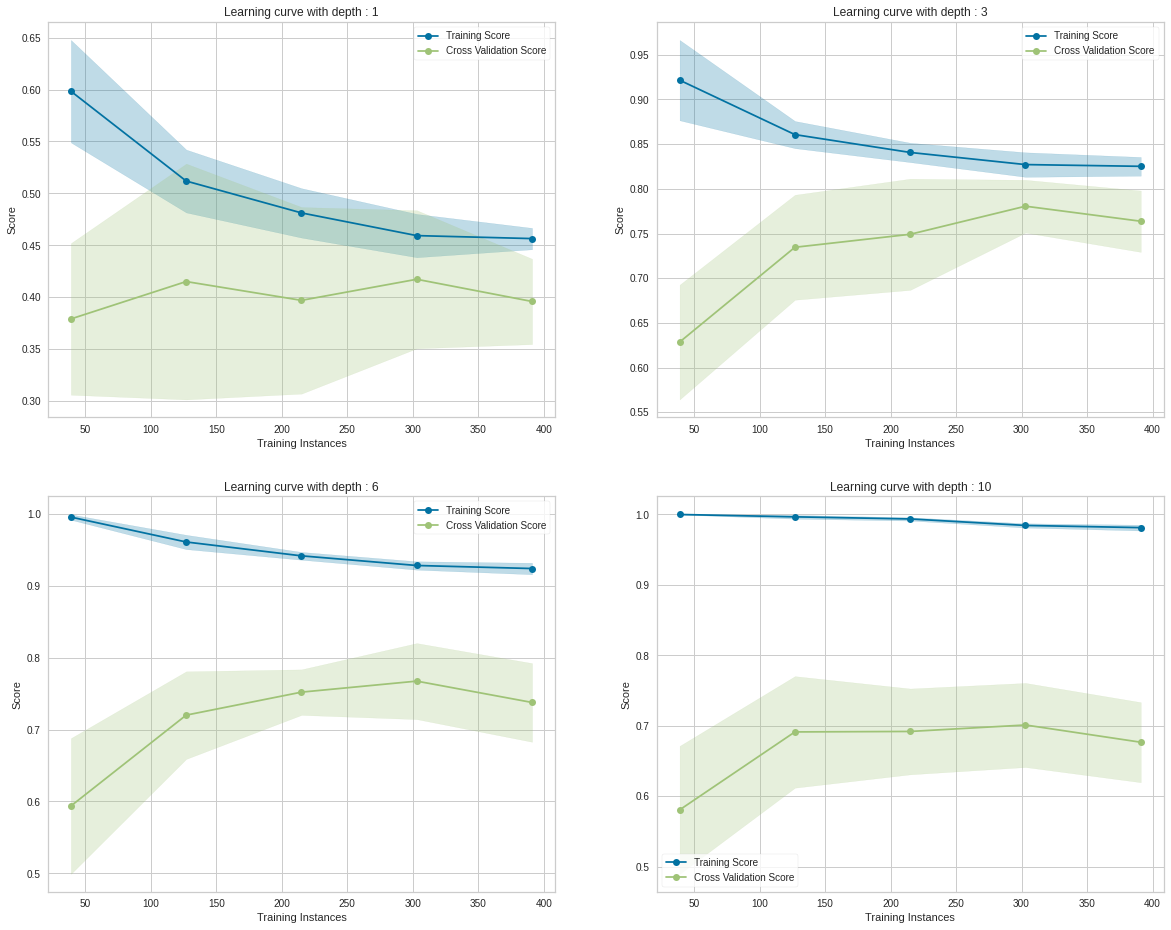

In [0]:
for k,depth in enumerate([1,3,6,10]):
  fig = plt.gcf()
  fig.set_size_inches(20,16)
  ax = plt.subplot(2,2,k+1)

  model = DecisionTreeRegressor(max_depth=depth)

  visualizer = LearningCurve(model, scoring='r2', cv=ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0),
                           ax = ax)
  visualizer.fit(features, prices)
  visualizer.finalize()

  visualizer.set_title(f'Learning curve with depth : {depth}')

**Intuitions**

1. Max_depth = 1(High Bias Scenario)
  * We can see the testing score (green line) increases slightly with the number of observations
  * However, the testing score only increases to approximately 0.425 which low. This indicates how the model does not generalize well for new, unseen, data.
  * Moreover, the training score (blue line) decreases with the number of observations. Also, the trainings score decreases to a very low score of approximatey 0.45 (the fall should be minimum). This indicates how the model does not seem to fit the data well.
  * Thus, we can say this model is facing a high bias problem. Consequently, having more training points would not benefit the model as the model is underfitting the dataset. Instead, **one should increase the model complexity to better fit the dataset**.
  * Moreover the testing score has reached almost flat line suggesting the model may not improve from adding more training points.

2. Max_depth = 3 (Ideal Scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.8
    * High score
    * Generalize well
  * Training score (blue line) decreases sligtly with training points
    * Reaches ~ 0.8
    * High score
    * Fit dataset well
  * There seems to be no high bias or high variance problem
    * Model fits and generalizes well
    * Ideal
    * More training points should help it become as even more ideal model.
3. Max_depth = 6 (Slightly High Variance Scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.78
    * Not so high score
    * Does not generalize well, as the distance b/w two curves is more.
  * Training score (blue line) decreases slightly with training points
    * At ~ 0.92
    * High score
    * Overfitting dataset as test score is far less compared to train score.
  * There seems to be high variance problem (test score is not as close to train)
    * Overfitting
    * More training points might help as curves are not converging.
    * This is getting close to ideal scenario
4. Mac_depth = 10 (High variance scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.7
    * Not so high score
    * Does not generalize well
  * Training score (blue line) barely decreases with training points
    * At ~ 1.0 and becomes as low as 0.98
    * Almost perfect score
    * Overfitting dataset
  * There seems to be high variance problem
    * Overfitting

**<h2>Validation Curve**

* Model validation is used to determine 'how effective an estimator is on data that it has been trained on' as well as 'how generalizable it is to new input'.
* To measure a model's performance we first split the dataset into training and test splits.
* Then fitting the model on that training data and scoring it on the reserved test data.
* In order to maximize the score, need to the optimum hyperparameter.
* Most models have multiple hyperparameters and use grid search to choose best one.
* However, it is useful to plot the influence of a single hyperparameter on the training and test data to determine if th estimator is **underfitting** or **overfitting** for some hyperparameter values.
* Validation curve is like error curve which we plot for each hyper parameter value on training and testing data set.
* Note that if we optimize the hyperparameters based on validation score, the validation score is biased (trying to achive the perfectness - overfitting) and not a good estimate of the generalization any longer.
* To get a proper estimate of the generalization we have to compute the score on another test set.

In [0]:
from yellowbrick.model_selection import ValidationCurve

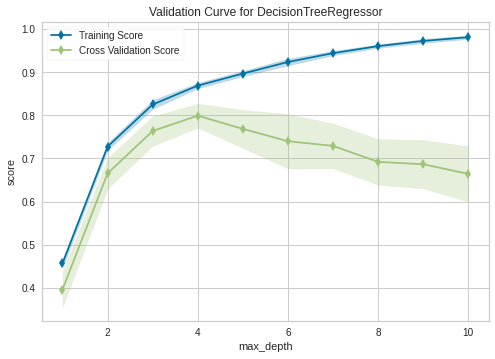

In [0]:
model = DecisionTreeRegressor()
visualizer = ValidationCurve(model, param_name='max_depth',
                             param_range=np.arange(1,11),
                             cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0),
                             scoring='r2')
visualizer.fit(features, prices)
visualizer.finalize()

**<h2> Bias-Variance Tradeoff**

* It is easy to identify whether the model is suffering from a **high bias** or **high variance**.
  * High variance models have a gap between the training and validation scores.
  * This is because it is able to fit the model well but unable to generalize well resulting in high training score but low validation score.
  * High bias models has small or no hap between the training and validation scores.
  * This is because it is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar low score

* Maximum depth of 1 : High Bias
  * Both training and testing scores are low.
  * There is barely a gap between the training and testing scores.
  * This indicates the model is not fitting the dataset well and not generalizing well hence the model is suffering from high bias.

* Maximum depth of 10: High Variance
  * Training score is high. Testing score is low.
  * There is substantial gap between the training and testing scores.
  * This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance.

**Best guess optimal model is at maximum deph 4**

**<h1>Evaluating Model Performance**

**<h2> Grid Search**

* Grid search allows to select the best possible model for prediction by allowing us to specify which of those parameters we want to change, their corresponding ranges and function scores to be optimised.
* Searches each of the models iteratively and gives the combination of values for those parameters that optimize the scoring function.

**<h2>Cross Validation**

**Summary**
* Dataset is split into K - folds of equal size.
* Each fold acts as the testing set 1 time and training set K-1 times.
* Average testing performance is used as the estimate of out-of-sample performance.
* Also known as cross-validated performance

**Benefits**
* More reliable estimate of out-of-sample performance than train/test spilt
* Reduce the variancee of a single trial of a tain/test split.
* Hence, with the benefits of K-fold cross-validation, we're able to use the average testing accuracy as a benchmark to decide which is the most optimal set of parameters for learning algorithm.
* If we don't use a cross-validation set and run the grid-search, we get different sets of parameters due to the fact that without CV set, the estimate out-of-sample performance would have a high variance.
* In summary, without k-fold cross-validation the risk is higher that grid search will select hyper-parameter value combinations that perform very well on  a specific train-test-split but poorly otherwise.

**Limitations**
* It doesn't work well when data is not uniformly distributed. (eg: sorted data)

**<h2>Implementation: Fitting a Model**

In [0]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):

  cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

  regressor = DecisionTreeRegressor(random_state=0)

  params = {'max_depth' : list(range(1,11))}

  #performance_metric - previously defined function
  scorin_fnc = make_scorer(performance_metric)

  grid = GridSearchCV(regressor, params, cv=cv_sets, scoring = scorin_fnc)
  grid = grid.fit(X, y)

  return grid.best_estimator_

**<h2> Making predictions**

In [0]:
reg = fit_model(X_train, y_train)

print('Parmeter \'max_depth\' is {} for the optimal model.'.format(reg.get_params()['max_depth']))

Parmeter 'max_depth' is 4 for the optimal model.


**<h1>Predicting the Selling Prices**

In [0]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

#Show predictions
for i, price in enumerate(reg.predict(client_data)):
  print('Predicted selling price for Client {}\'s home: ${:,.2f}'.format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Data Exploration Findings**

* Minimum price : \$105,000.0
* Maximum price : \$1,024,800.0
* Mean price : \$454,342.9447852761
* Median price : \$438,900.0
* Standard deviation of price : \$165,171.13154429477

**<h1>Exploration:**

1. Compared to the data-explorations, it seems that the houses' prices from client 1 and client 2 are below the mean and median prices.
2. For client 2, it seems reasonable due to the high poverty level and student-to-teacher ratio.
3. For client 1, it also seems reasonable due to the average provery level and student-to-teacher-ratio.
4. And the house's price from client 3 is way above the mean, median prices nearing to the maximum price in the dataset. This seems reasonable given the low poverty level and student-to-teacher ratio with a high number of rooms.

**<h2>Sensitivity**

* An optimal model is not necessarily a robust model.
* Sometimes, a model is either too **complex** or too **simple** to sufficiently generalize to new data.
* Sometimes, a model could use a **learning algorithm** that is not appropriate for the structure of the data given.
* Sometimes, the data itself could be too **noisy** or contain too **few samples** to allow a model to adequately capture the target variable -- i.e., the model is **underfitted**.

**We run the code below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data its trained on.**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def PredictTrials(X, y, fitter, data):

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range of predicted values
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [0]:
#For different sets of training data predictions are made for the below test example
client_data[0]

[5, 17, 15]

In [0]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


**<h1>Applicability**

* So, can the constructed model be used in real-world scenario?
* What other factors affect the model?
* Data collected from a rural city may not be applicable as the demographics would change and other features may be better able to fit the dataset instead of a model with features that was learned using urban data.
* The learning algorithm learned from a very old dataset may not be relevant because demographics have changed a lot since 1978. (data which we worked is of 1978s).
* There are only 3 features currently and more features can be added in future such as crime rates, nearby to city, public transport access and more.